## Part 2: Including Drag and a Variable g

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp 

In [2]:
G = 6.6743*10**-11 # gravitational constant [m^3/kg/s^2]
g0 = 9.81 # gravitational acceleration [m/s^2]
Me = 5.972*10**24 # mass of the earth [kg] 
Mm = 7.35*10**22 # mass of the moon [kg] 
Re = 6378.1e3 # radius of the earth [m] 
Rm = 1738.1e3 # radius of the moon [m] 
w = 7.272*10**-5 # earth's rotation rate at the equator [rad/s] 

### 1. 

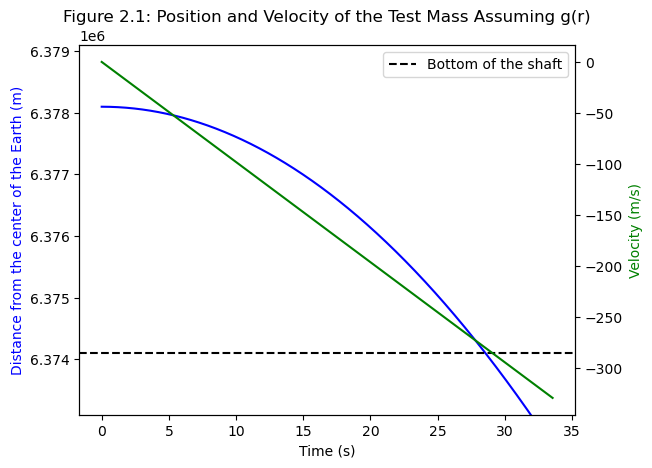

In [11]:
depth = 4*10**3 
a = g0
t = np.sqrt(depth/(0.5*a)) 

def g(y): 
    if y <=0:
        return 0 
    gr = g0*(y/Re)
    return gr
    
alph = 0 
gam = 2

def Eq2(t, b): 
    y, v = b

    dydt = v 
    dvdt = -g(y)+alph*v**gam
    return [dydt, dvdt]

t0, tf = 0, t+5
t_eval = np.linspace(t0, tf, 1000) 

y0 = Re
v0 = 0
ic = [y0, v0] 

bottom = Re-depth
def stop(t, s): 
    y, v = s 
    return y-bottom 

stop.terminal = False 
sol = solve_ivp(fun=Eq2, t_span=(t0, tf), y0 = ic, t_eval = t_eval, events=stop)

pos = sol.y[0] 
vel = sol.y[1] 
t_vals = sol.t 

fig, ax = plt.subplots() 
ax.plot(t_vals, pos, color='blue') 
ax.set_ylim(Re-5000, Re+1000) 
ax1 = ax.twinx() 
ax1.plot(t_vals, vel, label='Velocity', color='green') 
ax.axhline(y=Re-4000, color='black', ls='--', label='Bottom of the shaft')
ax.legend() 
ax.set_title("Figure 2.1: Position and Velocity of the Test Mass Assuming g(r)")
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Distance from the center of the Earth (m)", color='blue') 
ax1.set_ylabel("Velocity (m/s)", color='green');

Figure 2.1: This graph shows the plots of the distance, or position, between the test mass and the center of the Earth, and the velocity of the test mass as it falls. The position scale is logarithmic to account for the extremely large distance. At t=0 seconds, the position of the mass starts at the Earth's radius. The mass accelerates as the velocity decreases in a linear fashion.

### 2. 

In [19]:
bottom = Re-4000
def stop(t, s): 
    y, v = s 
    return y-bottom 

stop.terminal = True
sol1 = solve_ivp(fun=Eq2, t_span=(t0, tf), y0=ic, t_eval=t_eval, events=stop)
event = sol1.t_events[0][0] 
print(28.55686245854132-28.558355112896415) 

print(f'Using the events detection capability of solve_ivp, we find that it would take the test mass {event} seconds to reach the bottom of the shaft, when accounting for g(r) and neglecting drag.' ) 

-0.0014926543550934923
Using the events detection capability of solve_ivp, we find that it would take the test mass 83.54308278260291 seconds to reach the bottom of the shaft, when accounting for g(r) and neglecting drag.


When we incorporate a height-dependent g, the falling time only increases by 0.00149 seconds. This shows that accounting for a height dependent g does not affect the falling time much, but it still yields a slower falling time, likely because the acceleration is smaller when it's further from the center.

### 3. 

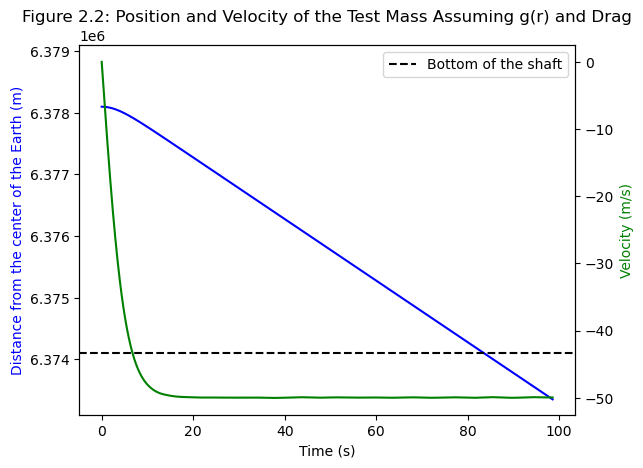

In [20]:
# 0=-g+alph*v^gam --> alph*v^gam=g --> alph=g/v^gam

vterm = 50 #m/s
gam = 2
alph = g0/vterm**gam

def Eq2a(t, b): 
    y, v = b

    dydt = v 
    dvdt = -g(y)+alph*v**gam
    return [dydt, dvdt]

t0, tf = 0, t+70
t_eval = np.linspace(t0, tf, 1000) 

y0 = Re
v0 = 0
ic = [y0, v0]

stop.terminal = False
sol2 = solve_ivp(fun=Eq2a, t_span=(t0, tf), y0=ic, t_eval=t_eval)

pos = sol2.y[0] 
vel = sol2.y[1] 
t_vals = sol2.t 

fig, ax2 = plt.subplots() 
ax2.plot(t_vals, pos, color='blue') 
ax2.set_ylim(Re-5000, Re+1000) 
ax3 = ax2.twinx() 
ax3.plot(t_vals, vel, color='green') 
ax2.axhline(y=Re-4000, color='black', ls='--', label='Bottom of the shaft')
ax2.set_title("Figure 2.2: Position and Velocity of the Test Mass Assuming g(r) and Drag")
ax2.set_xlabel("Time (s)") 
ax2.set_ylabel("Distance from the center of the Earth (m)", color='blue') 
ax2.legend() 
ax3.set_ylabel("Velocity (m/s)", color='green');


Figure 2.2: This graph is similar to the graph in Figure 2.1, but with drag taken into account. The position of the mass is decreasing in a mostly linear fashion, while the velocity plummets at the start and plateaus at around 15 seconds, which is roughly when the test mass reaches its terminal velocity of 50 m/s.

In [18]:
stop.terminal = True 
sol3 = solve_ivp(fun=Eq2a, t_span=(t0, tf), y0=ic, t_eval=t_eval, events=stop)

event = sol3.t_events[0][0]

print(f" Using the events detection capability of solve_ivp, we find that it would take the test mass {event} seconds to reach the bottom of the shaft, when accounting for g(r) and drag.") 


 Using the events detection capability of solve_ivp, we find that it would take the test mass 83.54308278260291 seconds to reach the bottom of the shaft, when accounting for g(r) and drag.
